In [1]:
#Cardiovascular Study Final

In [2]:
!pip install statsmodels
!pip install seaborn
!pip install dataframe_image

In [3]:
# Dependencies and Setup
import autopep8
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import dataframe_image as dfi
from scipy.stats import linregress
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
data_df = pd.read_csv("Resources/Heart_disease_data.csv")
data_df.head(4)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1


In [5]:
#Check for NaN values 
data_df.count()
#values_entered.isnull().sum() #alternative solution

AGE                  68783
GENDER               68783
HEIGHT               68783
WEIGHT               68783
AP_HIGH              68783
AP_LOW               68783
CHOLESTEROL          68783
GLUCOSE              68783
SMOKE                68783
ALCOHOL              68783
PHYSICAL_ACTIVITY    68783
CARDIO_DISEASE       68783
dtype: int64

In [6]:
#Convert intergers to descriptive values ie. 1 & 2 under gender column to 
values_entered = data_df.replace({"GENDER": {1 : "Female", 2 : "Male"}, 
                          "CHOLESTEROL": {1: "Normal", 2: "Above Normal", 3: "High"},
                          "GLUCOSE": {1: "Normal", 2: "Above Normal", 3: "High"},
                          "SMOKE": {0: "Non-Smoker", 1: "Smoker"},
                          "ALCOHOL": {0: "Non-Drinker", 1: "Drinker"},
                          "PHYSICAL_ACTIVITY": {0: "Does not Exercise", 1: "Does Exercise"},
                          "CARDIO_DISEASE": {0: "No Cardio related Disease", 1: "Evidence of Cardio Disease"}})
values_entered.head(4)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Disease
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease


In [7]:
#Row count
values_entered["CARDIO_DISEASE"].count()

68783

In [8]:
#Calculate BMI
height = (values_entered["HEIGHT"]**2)/10000
height

values_entered["BMI"] = (values_entered['WEIGHT']/height)
values_entered["BMI"].head(4)

0    21.967120
1    34.927679
2    23.507805
3    28.710479
Name: BMI, dtype: float64

In [9]:
#Insert BMI range into values_entered dataframe
def bmi_category(row):
    if row<= 18.5:
        res = "Underweight"
    elif row> 18.5 and row< 25:
        res = "Normal"
    elif row> 25 and row< 30:
        res = "OverWeight"
    else:
        res = "Obese"
    return res


values_entered['BMI_range'] = values_entered['BMI'].apply(lambda row: bmi_category(row))

values_entered.head(4)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,BMI_range
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Disease,21.967120,Normal
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,Obese
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,Normal
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,OverWeight


In [10]:
#Insert Blood Pressure into values_entered dataframe
def ap_check(row):
    if row['AP_HIGH'] >120:
        res = 'High'
    elif row['AP_LOW'] <80:
        res = 'Low'
    else :
        res = 'Normal'
    return res

values_entered['Blood_Pressure'] = values_entered.apply(lambda row: ap_check(row), axis=1)
values_entered.head(4)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,BMI_range,Blood_Pressure
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Disease,21.967120,Normal,Normal
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,Obese,High
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,Normal,High
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,OverWeight,High


In [11]:
#Review data averages, minimums and maximums
values_entered.describe()

,AGE,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,BMI
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,164.361252,74.121934,126.614585,81.381591,27.522793
std,6.768163,8.184850,14.331392,16.763763,9.676679,6.050677
min,30.000000,55.000000,11.000000,60.000000,40.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.346494
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.119376
max,65.000000,250.000000,200.000000,240.000000,190.000000,298.666667


In [12]:
#Review data value types
values_entered.dtypes

AGE                    int64
GENDER                object
HEIGHT                 int64
WEIGHT                 int64
AP_HIGH                int64
AP_LOW                 int64
CHOLESTEROL           object
GLUCOSE               object
SMOKE                 object
ALCOHOL               object
PHYSICAL_ACTIVITY     object
CARDIO_DISEASE        object
BMI                  float64
BMI_range             object
Blood_Pressure        object
dtype: object

In [13]:
#Insert new column to create unique ID for each participant.
values_entered.insert(0, 'New_ID', values_entered.index + 1)
values_entered.head(4)

,New_ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,BMI_range,Blood_Pressure
0,1,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Disease,21.967120,Normal,Normal
1,2,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,Obese,High
2,3,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,Normal,High
3,4,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,OverWeight,High


In [14]:
# #Create data frame of Blood Pressure with evidence of CVD
# blood_pressure_heart_disease = values_entered.loc[values_entered["CARDIO_DISEASE"] == "Evidence of Cardio Disease"]
# blood_pressure_heart_disease = blood_pressure_heart_disease[["Blood_Pressure","CARDIO_DISEASE"]]
# blood_pressure_heart_disease = blood_pressure_heart_disease.groupby("Blood_Pressure").count()
# blood_pressure_heart_disease = blood_pressure_heart_disease.sort_values("CARDIO_DISEASE", ascending=False)
# blood_pressure_heart_disease

In [15]:
# #Create bar graph of Blood Pressure with evidence of CVD
# blood_pressure_heart_disease.plot(kind="bar", figsize=(5,3))
# plt.title("Level of Blood Pressure vs \n The number of Patients with Cardiovascular Disease")
# plt.ylabel("Number of Patients")
# plt.show()

In [16]:
# #Create data frame of Blood Pressure and no evidence of CVD
# blood_pressure_no_heart_disease = values_entered.loc[values_entered["CARDIO_DISEASE"] == "No Cardio related Disease"]
# blood_pressure_no_heart_disease = blood_pressure_no_heart_disease[["Blood_Pressure","CARDIO_DISEASE"]]
# blood_pressure_no_heart_disease = blood_pressure_no_heart_disease.groupby("Blood_Pressure").count()
# blood_pressure_no_heart_disease = blood_pressure_no_heart_disease.sort_values("CARDIO_DISEASE", ascending=False)
# blood_pressure_no_heart_disease

In [17]:
# #Create bar graph of Blood Pressure and no evidence of CVD
# blood_pressure_no_heart_disease.plot(kind="bar", figsize=(5,3))
# plt.title("Level of Blood Pressure vs \n The number of Patients with no Cardiovascular Disease")
# plt.ylabel("Number of Patients")
# plt.show()

In [18]:
# # Combine both blood pressure tables and create a bar graph to compare CVD and Blood Pressure
# # Working on this format was soon abandoned when we learnt the seaborn method of plotting.
# # The use of xticks etc was explored by some of the group, to combine on one x axis variable with no success.

# combined_df = pd.concat([blood_pressure_heart_disease, blood_pressure_no_heart_disease])
# combined_df.plot(kind="bar", figsize=(5,3))
# plt.show()

In [19]:
#The following groupby cross tables were replaced further in the script
#with the panda's crosstab function as it included total figures for rows and columns

In [20]:
# #Create contingency table for CVD verses Cholesterol with groupby function
# values_entered.groupby(['CARDIO_DISEASE', 'CHOLESTEROL'])['CHOLESTEROL'].count().unstack().fillna(0)

In [21]:
# #Create contingency table for CVD verses Blood Pressure values_entered.groupby(['CARDIO_DISEASE', 'ALCOHOL'])['ALCOHOL'].count().unstack().fillna(0) with groupby function
# values_entered.groupby(['CARDIO_DISEASE', 'Blood_Pressure'])['Blood_Pressure'].count().unstack().fillna(0)

In [22]:
# #Create contingency table for CVD verses Age with groupby function
# values_entered.groupby(['CARDIO_DISEASE', 'AGE'])['AGE'].count().unstack().fillna(0)
# #not useful unless we use Steve's Binning

In [23]:
# values_entered.groupby(['CARDIO_DISEASE', 'PHYSICAL_ACTIVITY'])['PHYSICAL_ACTIVITY'].count().unstack().fillna(0)

In [24]:
# values_entered.groupby(['CARDIO_DISEASE', 'SMOKE'])['SMOKE'].count().unstack().fillna(0)

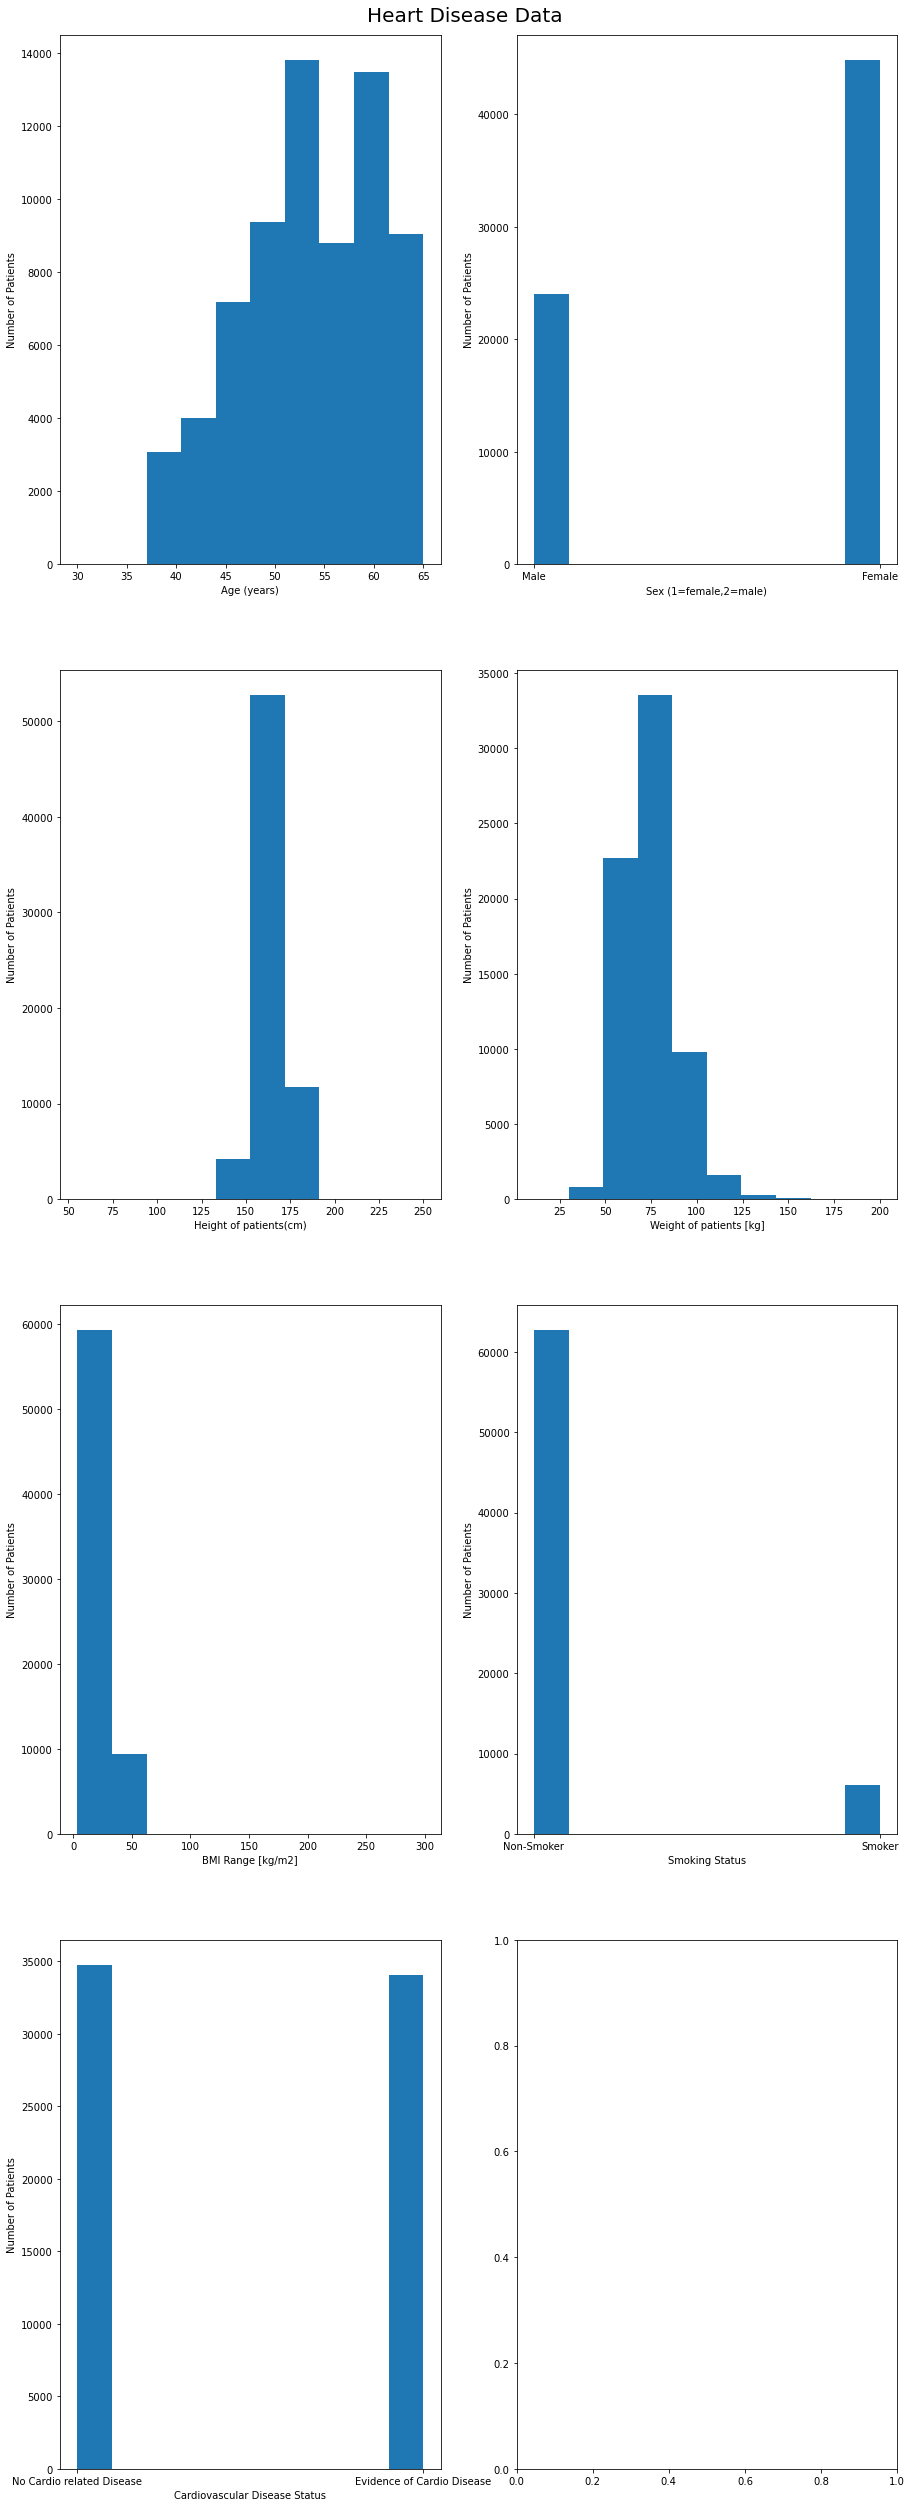

In [25]:
fig, axes = plt.subplots( nrows=4, ncols=2, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axes[0,0].hist(values_entered.AGE)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(values_entered.GENDER)
axes[0,1].set_xlabel("Sex (1=female,2=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[1,0].hist(values_entered.HEIGHT)
axes[1,0].set_xlabel("Height of patients(cm)")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(values_entered.WEIGHT)
axes[1,1].set_xlabel("Weight of patients [kg]")
axes[1,1].set_ylabel("Number of Patients")
axes[2,0].hist(values_entered.BMI)
axes[2,0].set_xlabel("BMI Range [kg/m2]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(values_entered.SMOKE)
axes[2,1].set_xlabel("Smoking Status")
axes[2,1].set_ylabel("Number of Patients")
axes[3,0].hist(values_entered.CARDIO_DISEASE)
axes[3,0].set_xlabel("Cardiovascular Disease Status")
axes[3,0].set_ylabel("Number of Patients")
plt.show()

In [26]:
#Insert BMI into original data frame data_df
height = (data_df["HEIGHT"]**2)/10000
height
data_df["BMI"] = (data_df['WEIGHT']/height)
data_df["BMI"]


def ap_check(row):
    if row['AP_HIGH'] >120:
        res = 2
    elif row['AP_LOW'] <80:
        res = 0
    else :
        res = 1
    return res

data_df['Blood_Pressure'] = data_df.apply(lambda row: ap_check(row), axis=1)

data_df.head(4)


,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood_Pressure
0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120,1
1,55,1,156,85,140,90,3,1,0,0,1,1,34.927679,2
2,52,1,165,64,130,70,3,1,0,0,0,1,23.507805,2
3,48,2,169,82,150,100,1,1,0,0,1,1,28.710479,2


In [27]:
# Set up dataframe with a constant for Logistic Regression
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(data_df)
heart_df_constant.head(4)


,const,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood_Pressure
0,1.0,50,2,168,62,110,80,1,1,0,0,1,0,21.967120,1
1,1.0,55,1,156,85,140,90,3,1,0,0,1,1,34.927679,2
2,1.0,52,1,165,64,130,70,3,1,0,0,0,1,23.507805,2
3,1.0,48,2,169,82,150,100,1,1,0,0,1,1,28.710479,2


In [28]:
# Calculate Logistic Regression
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
#cols=heart_df_constant.columns[:-1]
#cols = ['const','AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','BMI','Blood_Pressure']
#Removed GENDER column as P[z] score was very high at 0.486. Most likely because our data has 60+% female participants
cols = ['const','AGE','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','BMI','Blood_Pressure']
model=sm.Logit(data_df.CARDIO_DISEASE,heart_df_constant[cols])
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.560425
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         CARDIO_DISEASE   No. Observations:                68783
Model:                          Logit   Df Residuals:                    68770
Method:                           MLE   Df Model:                           12
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.1914
Time:                        18:26:31   Log-Likelihood:                -38548.
converged:                       True   LL-Null:                       -47673.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.6775      0.361    -26.783      0.000     -10.386      -8.969
AGE                   0.0505      0.001     37.331      0.000       0.048       0.053
HEIGHT               -0.0065      0.002     -3.288      0.001      -0.010      -0.003
WEIGHT                0.0129      0.002      7.766      0.000       0.010       0.016
AP_HIGH               0.0459      0.001     40.841      0.000       0.044       0.048
AP_LOW                0.0108      0.001      7.276      0.000       0.008       0.014
CHOLESTEROL           0.4934      0.016     31.556      0.000       0.463       0.524
GLUCOSE              -0.1199      0.018     -6.771      0.000      -0.155      -0.085
SMOKE                -0.1538      0.034     -4.569      0.000      -0.220      -0.088
ALCOHOL              -0.2118      0.042     -5.023      0.000      -0.295      -0.129
PHYSICAL_ACTIVITY    -0.2273      0.022    -10.369      0.000      -0.270      -0.184
BMI                  -0.0063      0.004     -1.620      0.105      -0.014       0.001
Blood_Pressure        0.2265      0.023      9.826      0.000       0.181       0.272
=====================================================================================
"""

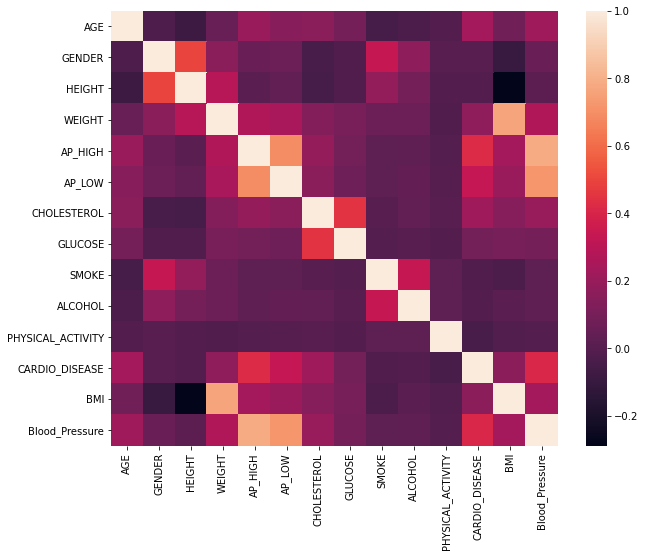

In [29]:
#Create heatmap of correlation of all factors and save as image
plt.figure(figsize=(10,8))
heart_df_constant_new=heart_df_constant.drop('const',axis=1)
heart_df_constant_new.corr()
CORRHEATMAP=sns.heatmap(heart_df_constant_new.corr())

CORRHEATMAP.figure.savefig("Output_Graph/CORRHEATMAP.png")

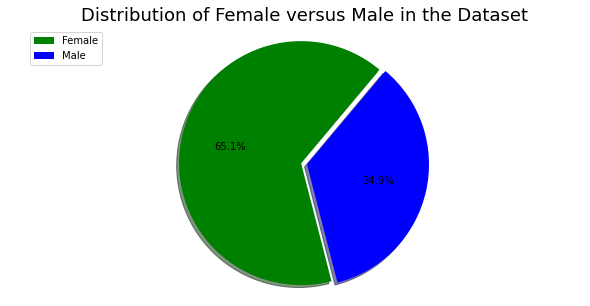

In [30]:
#Create a pie graph to show the gender split and save image.
genderpercentage = values_entered["New_ID"].groupby([values_entered["GENDER"]]).nunique()
#print(genderpercentage)

list_sex = genderpercentage.keys()
list_sex
explode = [0.05, 0]
colors = ['green', 'blue']
plt.figure(figsize=(10,5))
GENDERPIE=genderpercentage.plot(kind='pie', y=list_sex, autopct='%1.1f%%',labels=['',''],
                      explode=explode, colors=colors, startangle=50, shadow=True)

plt.title('Distribution of Female versus Male in the Dataset', fontsize=18)
plt.axis("equal")
plt.ylabel(' ', fontsize=14)
plt.legend(loc=2,labels=list_sex)

GENDERPIE.figure.savefig("Output_Graph/GENDERPIE.png")

plt.show()

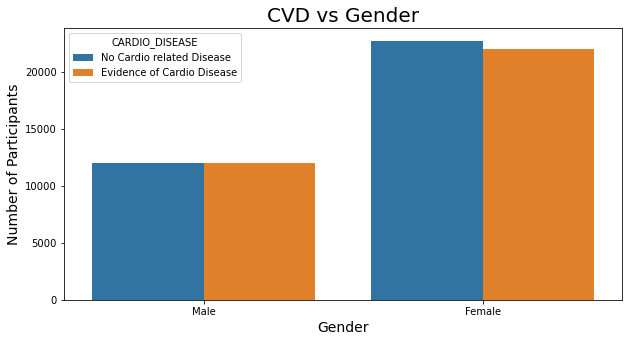

In [31]:
#Plot a bar graph showing relationship between CVD and Gender
#data_df['GENDER'] =data_df['GENDER']
#sns.countplot(data=data_df,x='GENDER',hue='CARDIO_DISEASE')
# 'data_df' has integers (1 & 2) for the gender. Redo with 'values_entered' dataframe
plt.figure(figsize=(10,5))
values_entered['GENDER'] = values_entered['GENDER']
GENDERBAR=sns.countplot(data=values_entered,x='GENDER',hue='CARDIO_DISEASE')
plt.title('CVD vs Gender', fontsize=20)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
GENDERBAR.figure.savefig("Output_Graph/GENDERBAR.png") 
plt.show()

In [32]:
# Create a cross table for Cardio_Disease verses Gender and save as image
# pd.crosstab(heart_df.CARDIO_DISEASE, heart_df.GENDER, margins=True, margins_name="Total")
# 'data_df' has integers (1 & 2) for the gender. Redo with 'values_entered' dataframe
GENDERXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.GENDER, margins=True, margins_name="Total")
GENDERXTABSTYLE=GENDERXTAB.style.background_gradient('Pastel2')
dfi.export(GENDERXTAB,"Output_Data/GENDERXTAB.png")
dfi.export(GENDERXTABSTYLE,"Output_Data/GENDERXTABstyle.png")
GENDERXTABSTYLE

GENDER,Female,Male,Total
CARDIO_DISEASE,,,
Evidence of Cardio Disease,22051,11990,34041
No Cardio related Disease,22744,11998,34742
Total,44795,23988,68783


In [33]:
# Experimented with heatmap option for cross tables, however, we decided data was clearer and easier to read in pandas format.
# sns.heatmap(pd.crosstab([values_entered.CARDIO_DISEASE], [values_entered.GENDER], margins=True, margins_name="Total"),
#             cmap="YlGnBu", annot=True, fmt='g', linewidths=0.05, linecolor='black', cbar=False)
# plt.show()

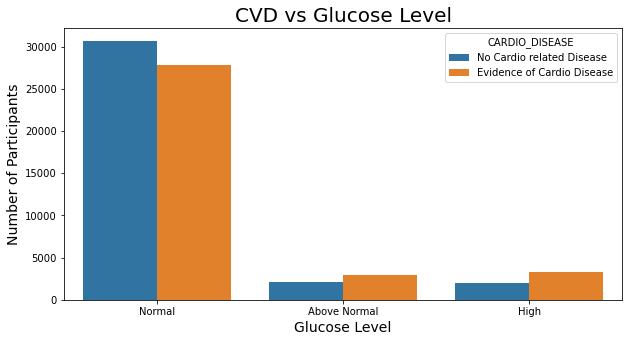

In [34]:
#Plot a bar graph showing relationship between CVD and Glucose Level
plt.figure(figsize=(10,5))
values_entered['GLUCOSE'] = values_entered['GLUCOSE']
GLUCOSEBAR=sns.countplot(data=values_entered,x='GLUCOSE',hue='CARDIO_DISEASE')
plt.title('CVD vs Glucose Level', fontsize=20)
plt.xlabel('Glucose Level', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
GLUCOSEBAR.figure.savefig("Output_Graph/GLUCOSEBAR.png")
plt.show()

In [35]:
# Create a cross table for Cardio_Disease verses Glucose and save as image
GLUCOSEXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.GLUCOSE, margins=True, margins_name="Total")
GLUCOSEXTABSTYLE=GLUCOSEXTAB.style.background_gradient('Pastel2')
dfi.export(GLUCOSEXTAB,"Output_Data/GLUCOSEXTAB.png")
dfi.export(GLUCOSEXTABSTYLE,"Output_Data/GLUCOSEXTABstyle.png")
GLUCOSEXTABSTYLE

GLUCOSE,Above Normal,High,Normal,Total
CARDIO_DISEASE,,,,
Evidence of Cardio Disease,2987,3239,27815,34041
No Cardio related Disease,2087,1996,30659,34742
Total,5074,5235,58474,68783


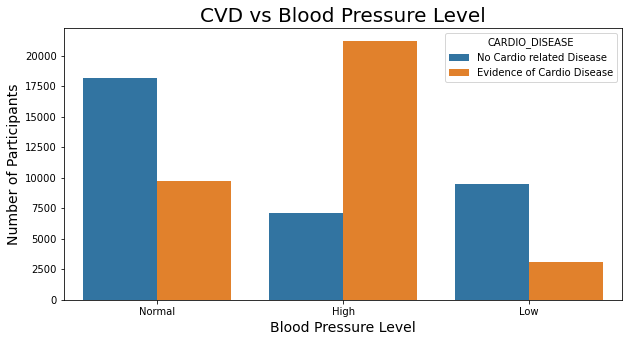

In [36]:
#Plot a bar graph showing relationship between CVD and Blood Pressure Level
plt.figure(figsize=(10,5))
values_entered['Blood_Pressure'] = values_entered['Blood_Pressure']
BLOODBAR=sns.countplot(data=values_entered,x='Blood_Pressure',hue='CARDIO_DISEASE')
plt.title('CVD vs Blood Pressure Level', fontsize=20)
plt.xlabel('Blood Pressure Level', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
BLOODBAR.figure.savefig("Output_Graph/BLOODBAR.png")
plt.show()

In [37]:
# Create a cross table for Cardio_Disease verses Blood Pressure and save as image
BLOODXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.Blood_Pressure, margins=True, margins_name="Total")
BLOODXTABSTYLE=BLOODXTAB.style.background_gradient('Pastel2')
dfi.export(BLOODXTAB,"Output_Data/BLOODXTAB.png")
dfi.export(BLOODXTABSTYLE,"Output_Data/BLOODXTABstyle.png")
BLOODXTABSTYLE

Blood_Pressure,High,Low,Normal,Total
CARDIO_DISEASE,,,,
Evidence of Cardio Disease,21203,3082,9756,34041
No Cardio related Disease,7085,9456,18201,34742
Total,28288,12538,27957,68783


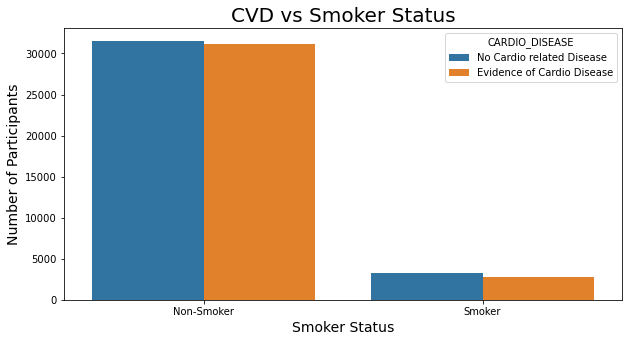

In [38]:
#Plot a bar graph showing relationship between CVD and Smoker Status
plt.figure(figsize=(10,5))
values_entered['SMOKE'] = values_entered['SMOKE']
SMOKEBAR=sns.countplot(data=values_entered,x='SMOKE',hue='CARDIO_DISEASE')
plt.title('CVD vs Smoker Status', fontsize=20)
plt.xlabel('Smoker Status', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
SMOKEBAR.figure.savefig("Output_Graph/SMOKEBAR.png")
plt.show()

In [39]:
# Create a cross table for Cardio_Disease verses Smoker Status and save as image
SMOKEXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.SMOKE, margins=True, margins_name="Total")
SMOKEXTABSTYLE=SMOKEXTAB.style.background_gradient('Pastel2')
dfi.export(SMOKEXTAB,"Output_Data/SMOKEXTAB.png")
dfi.export(SMOKEXTABSTYLE,"Output_Data/SMOKEXTABstyle.png")
SMOKEXTABSTYLE

SMOKE,Non-Smoker,Smoker,Total
CARDIO_DISEASE,,,
Evidence of Cardio Disease,31204,2837,34041
No Cardio related Disease,31526,3216,34742
Total,62730,6053,68783


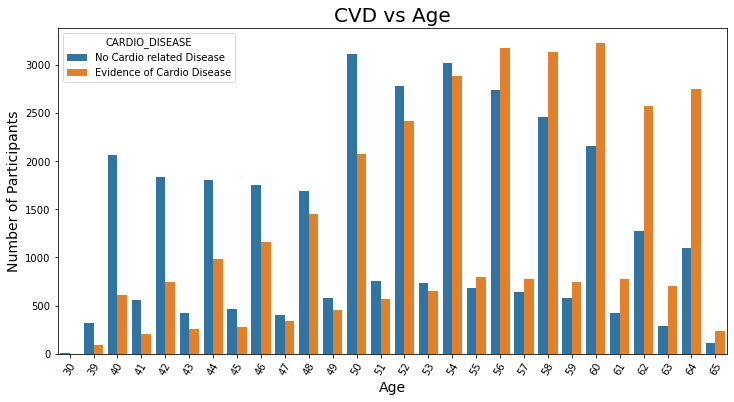

In [40]:
#Plot a bar graph showing relationship between CVD and Age

plt.figure(figsize=(12,6))
values_entered['AGE'] = values_entered['AGE']
AGEBAR=sns.countplot(data=values_entered,x='AGE',hue='CARDIO_DISEASE')
plt.title('CVD vs Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
AGEBAR.figure.savefig("Output_Graph/AGEBAR.png")
plt.xticks(rotation=60)
plt.show()


In [41]:
# Create a cross table for Cardio_Disease verses Age and save as image
AGEXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.AGE, margins=True, margins_name="Total")
AGEXTABSTYLE=AGEXTAB.style.background_gradient('Pastel2')
dfi.export(AGEXTAB,"Output_Data/SGEXTAB.png")
dfi.export(AGEXTABSTYLE,"Output_Data/AGEXTABstyle.png")
AGEXTABSTYLE

AGE,30,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,Total
CARDIO_DISEASE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Evidence of Cardio Disease,0,86,609,201,748,255,983,280,1156,343,1454,458,2076,569,2414,646,2879,798,3175,778,3133,748,3223,771,2574,706,2743,235,34041
No Cardio related Disease,4,316,2065,553,1838,419,1805,466,1754,401,1691,582,3111,756,2780,737,3018,679,2736,644,2453,582,2154,425,1276,291,1097,109,34742
Total,4,402,2674,754,2586,674,2788,746,2910,744,3145,1040,5187,1325,5194,1383,5897,1477,5911,1422,5586,1330,5377,1196,3850,997,3840,344,68783


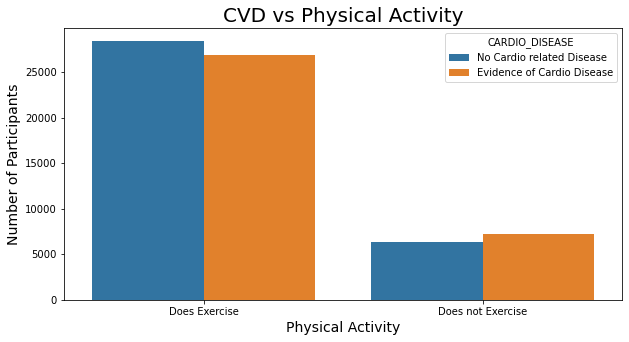

In [42]:
#Plot a bar graph showing relationship between CVD and Physical Activity
plt.figure(figsize=(10,5))
values_entered['PHYSICAL_ACTIVITY'] = values_entered['PHYSICAL_ACTIVITY']
PHYSICALBAR=sns.countplot(data=values_entered,x='PHYSICAL_ACTIVITY',hue='CARDIO_DISEASE')
plt.title('CVD vs Physical Activity', fontsize=20)
plt.xlabel('Physical Activity', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PHYSICALBAR.figure.savefig("Output_Graph/PHYSICALBAR.png")
plt.show()

In [43]:
# Create a cross table for Cardio_Disease verses Physical Activity and save as image
PHYSICALXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.PHYSICAL_ACTIVITY, margins=True, margins_name="Total")
PHYSICALXTABSTYLE=PHYSICALXTAB.style.background_gradient('Pastel2')
dfi.export(PHYSICALXTAB,"Output_Data/PHYSICALXTAB.png")
dfi.export(PHYSICALXTABSTYLE,"Output_Data/PHYSICALXTABstyle.png")
PHYSICALXTABSTYLE

PHYSICAL_ACTIVITY,Does Exercise,Does not Exercise,Total
CARDIO_DISEASE,,,
Evidence of Cardio Disease,26839,7202,34041
No Cardio related Disease,28419,6323,34742
Total,55258,13525,68783


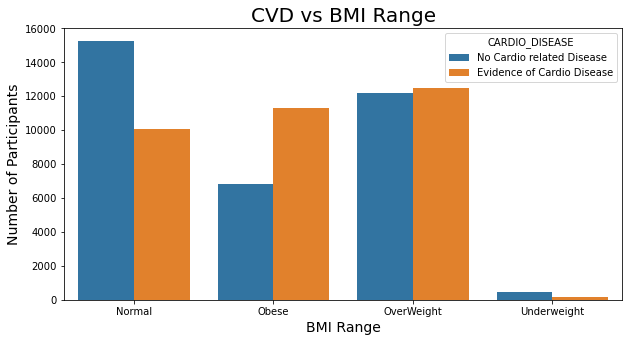

In [44]:
#Plot a bar graph showing relationship between CVD and BMI Range
plt.figure(figsize=(10,5))
values_entered['BMI_range'] = values_entered['BMI_range']
BMIBAR=sns.countplot(data=values_entered,x='BMI_range',hue='CARDIO_DISEASE')
plt.title('CVD vs BMI Range', fontsize=20)
plt.xlabel('BMI Range', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
BMIBAR.figure.savefig("Output_Graph/BMIBAR.png")
plt.show()

In [45]:
# Create a cross table for Cardio_Disease verses BMI Range and save as image
BMICROSSTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.BMI_range, margins=True, margins_name="Total")
BMICROSSTABSTYLE=BMICROSSTAB.style.background_gradient('Pastel2')
dfi.export(BMICROSSTAB,"Output_Data/BMIXTAB.png")
dfi.export(BMICROSSTABSTYLE,"Output_Data/BMITABstyle.png")
BMICROSSTABSTYLE

BMI_range,Normal,Obese,OverWeight,Underweight,Total
CARDIO_DISEASE,,,,,
Evidence of Cardio Disease,10073,11321,12469,178,34041
No Cardio related Disease,15259,6824,12192,467,34742
Total,25332,18145,24661,645,68783


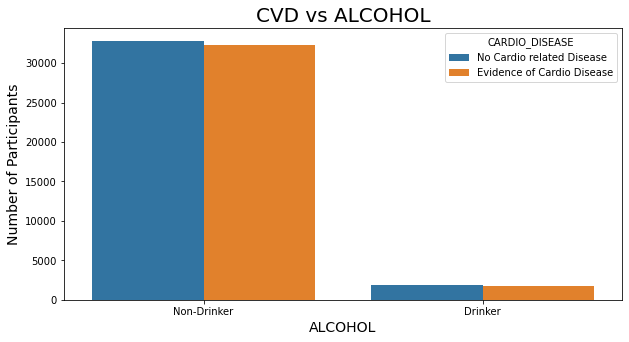

In [46]:
#Plot a bar graph showing relationship between CVD and Alcohol
plt.figure(figsize=(10,5))
values_entered['ALCOHOL'] = values_entered['ALCOHOL']
ALCOHOLBAR=sns.countplot(data=values_entered,x='ALCOHOL',hue='CARDIO_DISEASE')
plt.title('CVD vs ALCOHOL', fontsize=20)
plt.xlabel('ALCOHOL', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ALCOHOLBAR.figure.savefig("Output_Graph/ALCOHOLBAR.png")
plt.show()

In [47]:
# Create a cross table for Cardio_Disease verses BMI Range and save as image
ALCOHOLXTAB=pd.crosstab(values_entered.CARDIO_DISEASE, values_entered.ALCOHOL, margins=True, margins_name="Total")
ALCOHOLXTABSTYLE=ALCOHOLXTAB.style.background_gradient('Pastel2')
dfi.export(ALCOHOLXTAB,"Output_Data/ALCOHOLXTAB.png")
dfi.export(ALCOHOLXTABSTYLE,"Output_Data/ALCOHOLXTABstyle.png")
BMICROSSTABSTYLE

BMI_range,Normal,Obese,OverWeight,Underweight,Total
CARDIO_DISEASE,,,,,
Evidence of Cardio Disease,10073,11321,12469,178,34041
No Cardio related Disease,15259,6824,12192,467,34742
Total,25332,18145,24661,645,68783


In [48]:
#Logistic regressions predictive model
#Groupby data by CARDIO_DISEASE

new_df = data_df[["AGE","CHOLESTEROL","SMOKE","ALCOHOL","PHYSICAL_ACTIVITY","BMI","Blood_Pressure","CARDIO_DISEASE"]]

x = new_df[["BMI","Blood_Pressure","AGE","PHYSICAL_ACTIVITY"]]#.values.reshape(-1,1)
y = new_df["CARDIO_DISEASE"]#.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size=0.8)


#X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5)
y_train

45710    1
20798    1
39393    1
45608    0
19752    1
        ..
29293    1
53362    1
62958    1
30045    0
45053    1
Name: CARDIO_DISEASE, Length: 55026, dtype: int64

In [49]:
#Predictive Analysis using the Logistic Regression module.
X_test

,BMI,Blood_Pressure,AGE,PHYSICAL_ACTIVITY
38278,25.970116,1,57,1
60648,24.913495,1,42,1
24236,26.912726,2,47,1
41553,25.359256,2,54,1
25525,25.099502,1,40,1
...,...,...,...,...
45056,25.795918,2,50,1
25693,23.046875,1,64,1
58416,31.243801,2,56,1
9628,25.351541,1,54,0


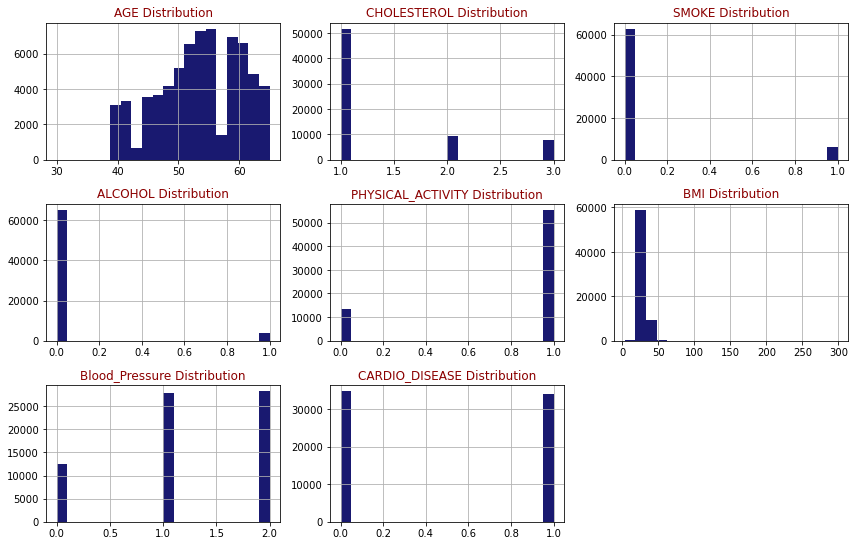

In [50]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(12,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()
    plt.savefig('Output_Graph/HISTALLVARIABLES.png')
    plt.show()
draw_histograms(new_df,new_df.columns,6,3)

In [51]:
model_lgstc = LogisticRegression()

model_lgstc.fit(X_train,y_train)

LogisticRegression()

In [52]:
#Predictive Analysis using the Logistic Regression module.
X_test

,BMI,Blood_Pressure,AGE,PHYSICAL_ACTIVITY
38278,25.970116,1,57,1
60648,24.913495,1,42,1
24236,26.912726,2,47,1
41553,25.359256,2,54,1
25525,25.099502,1,40,1
...,...,...,...,...
45056,25.795918,2,50,1
25693,23.046875,1,64,1
58416,31.243801,2,56,1
9628,25.351541,1,54,0


In [53]:
#Accuracy Score
model_lgstc.score(X_test,y_test)

0.7195609507886894

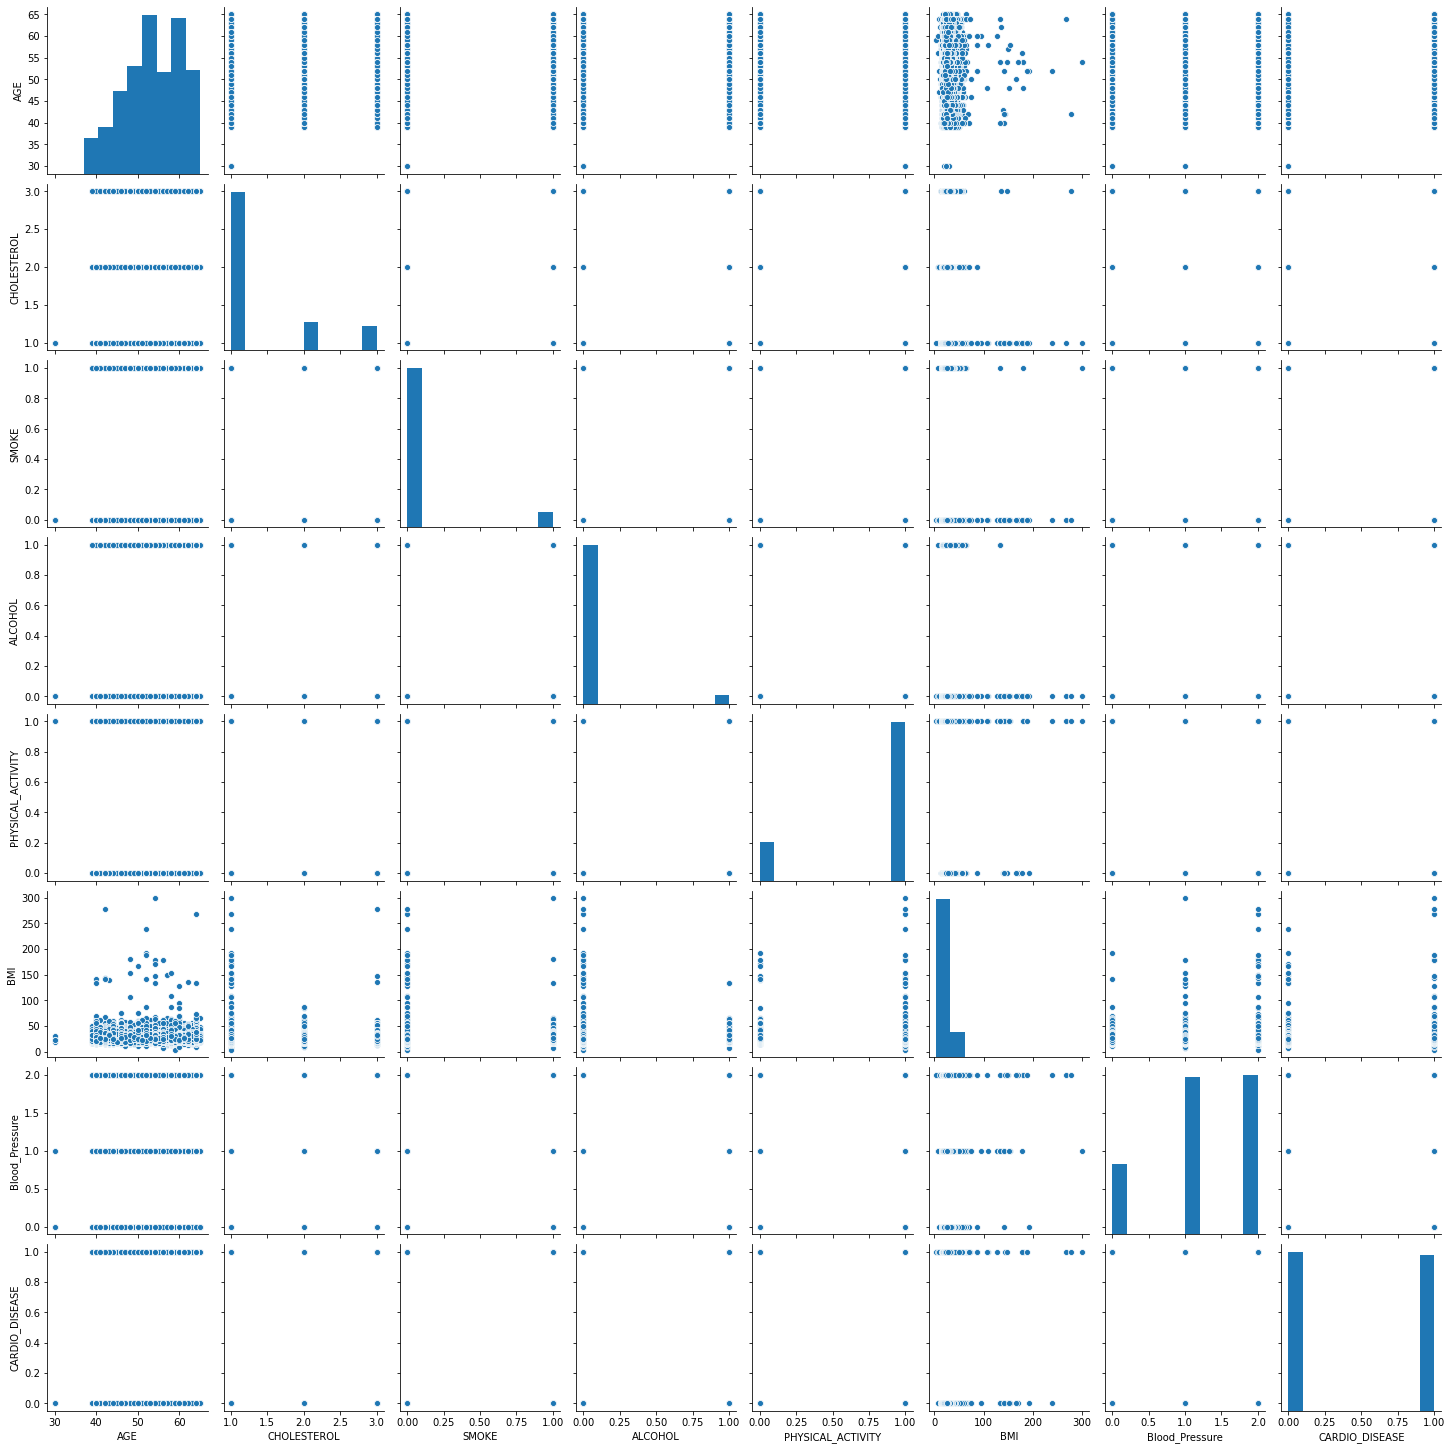

In [54]:
sns.pairplot(data=new_df)
plt.savefig('Output_Graph/REGRESSIONGRAPH.png')

In [55]:
new_features=new_df
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [56]:
y

0        0
1        1
2        1
3        1
4        0
        ..
68778    0
68779    1
68780    1
68781    1
68782    0
Name: CARDIO_DISEASE, Length: 68783, dtype: int64

In [57]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [58]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7249400305299121

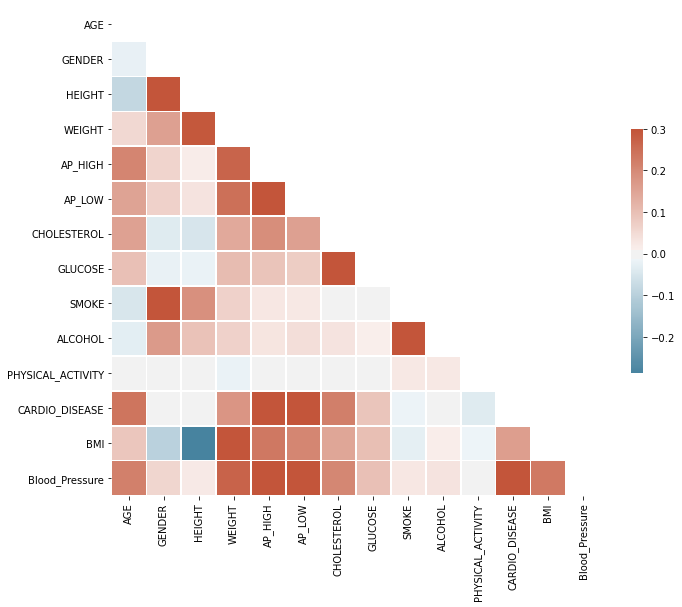

In [59]:
#sns.set_theme(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = data_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Output_Graph/MASKEDCORRELATION.png')